# Heart Desease II - Decision Tree vs Random Forest

by Raphael Nussbaumer, Laurin Mühlebach, Lionel Nyffeler

Inhaltsverzeichnis
- **1 Import**
    - 1.1 Basic Libraries
    - 1.2 Importing the Dataset
- **2 Dataset Description**
- **3 Normalize the Dataset**
- **4 Split the Dataset in Multiclass and Binary**
    - 4.1 Multiclass
    - 4.2 Binary
- **5 Define X & Y**
    - 5.1 Multiclass
    - 5.2 Binary
- **6 Analysis of the different classes**
- **7 Split the Dataset into Train-Validation-Test**
    - 7.1 Multiclass
    - 7.2 Binary
- **8 Implementing the Models**
    - 8.1 Decision Tree Binary
      - 8.1.1 Decision Tree Binary Basic
      - 8.1.2 Decision Tree Binary Cross Validation
    - 8.2 Decision Tree with Multiclass
      - 8.2.1 Decision Tree Multiclass Basic
      - 8.2.2 Decision Tree Multiclass Cross Validation
    - 8.3 Random Forest Binary
    - 8.4 Random Forest Multiclass
- **9 All Results**
- **10 Plots of best Model**

### 1 Import <div id="heading--1"/>

#### 1.1 Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# other imports will be made when needed later in the code

#### 1.2 Importing the Dataset

In [2]:
HD = pd.read_csv('HeartDisease.csv', sep=',')

In [3]:
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2 Dataset Description

In [4]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [5]:
print('The shape of the Dataset is: ', HD.shape)

The shape of the Dataset is:  (297, 14)


In [6]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#find out number of NULL Values:
HD.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [8]:
corr_matrix = HD.corr()
corr_matrix.style.background_gradient(cmap='YlOrRd')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [9]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [10]:
for i in cols[:]: 
    plt.hist(HD[HD["class binary"]==1][i], color='blue', label='True', alpha=0.7, density=True)
    plt.hist(HD[HD["class binary"]==0][i], color='red', label='False', alpha=0.7, density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

KeyError: 'class binary'

In [ ]:
HD["class"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

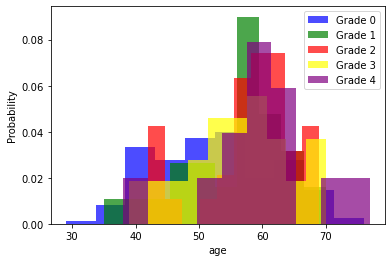

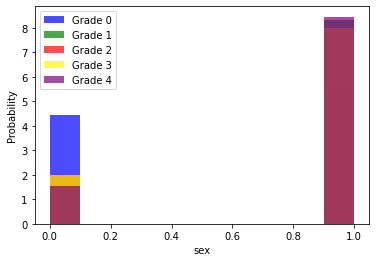

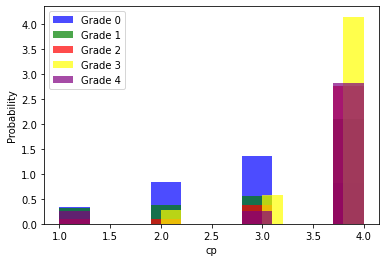

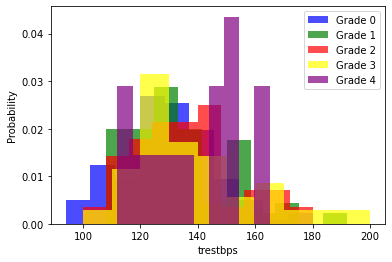

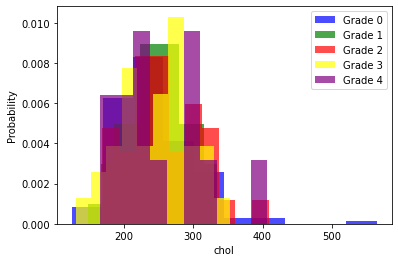

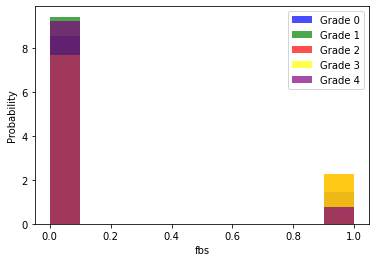

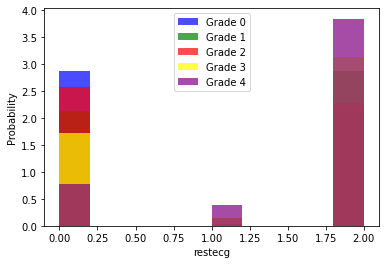

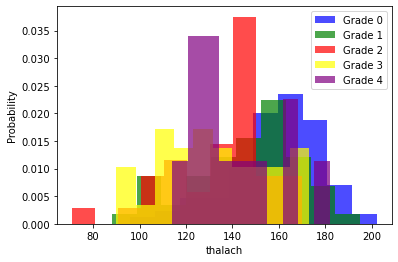

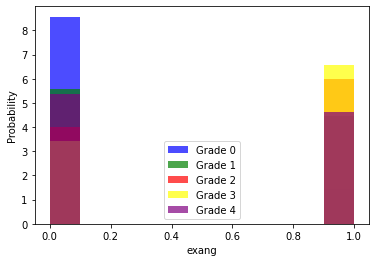

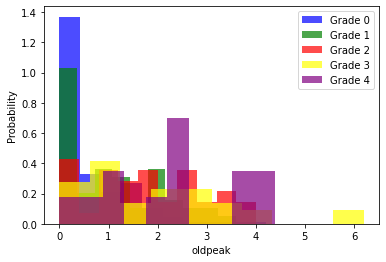

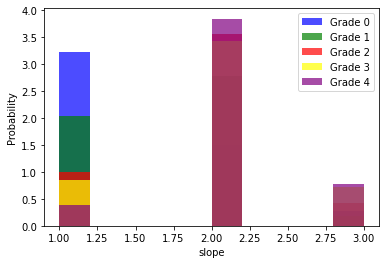

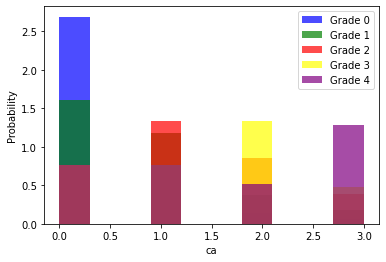

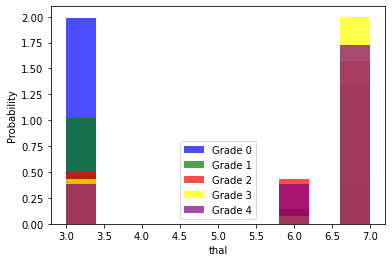

In [ ]:
for i in cols[:]: 
    plt.hist(HD[HD["class"]==0][i], color='blue', label='Grade 0', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==1][i], color='green', label='Grade 1', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==2][i], color='red', label='Grade 2', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==3][i], color='yellow', label='Grade 3', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==4][i], color='purple', label='Grade 4', alpha=0.7, density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

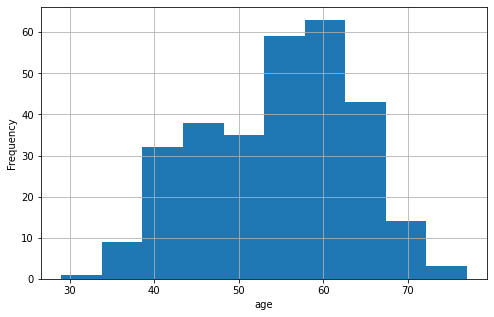

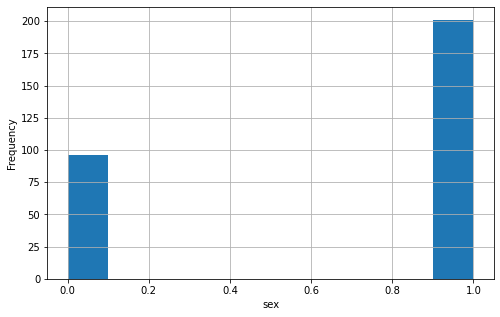

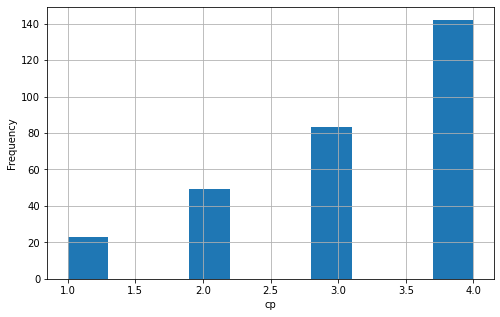

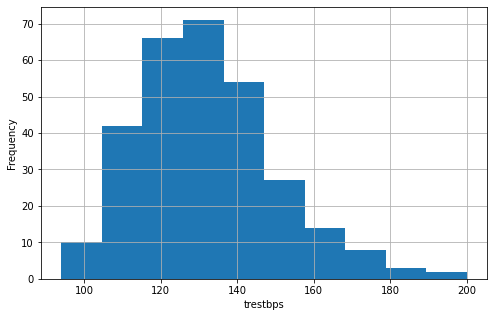

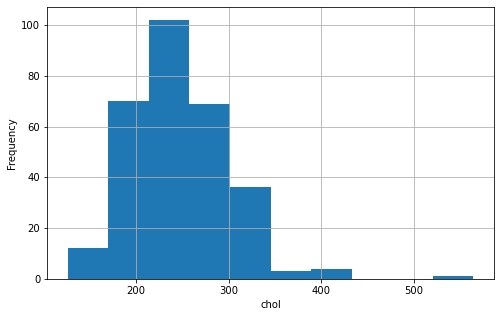

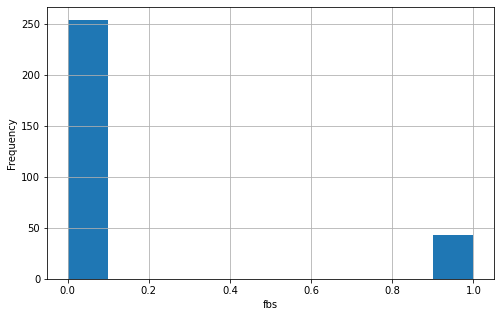

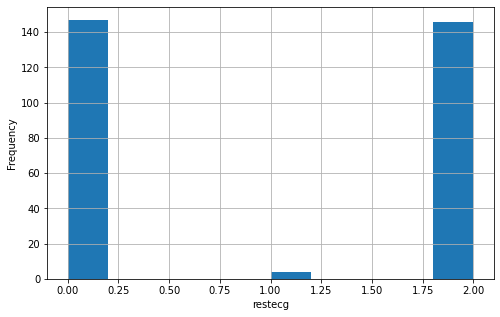

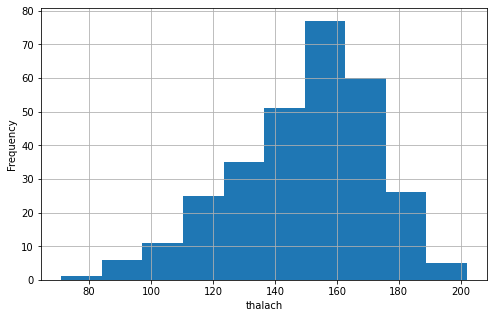

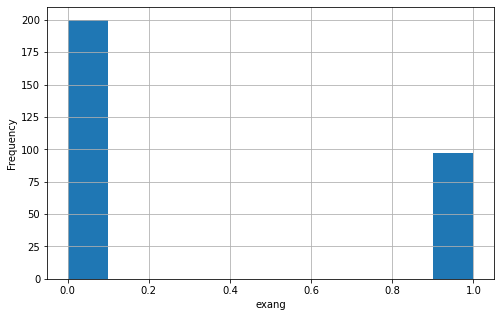

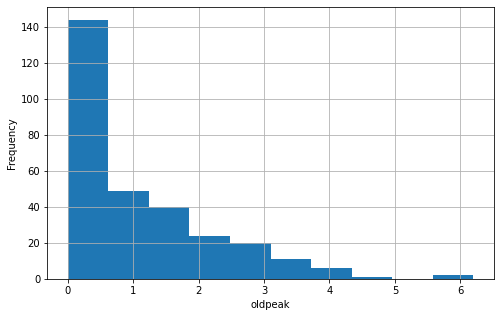

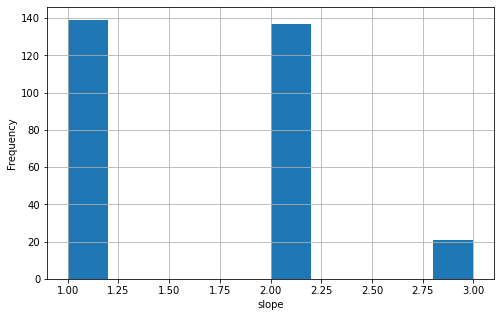

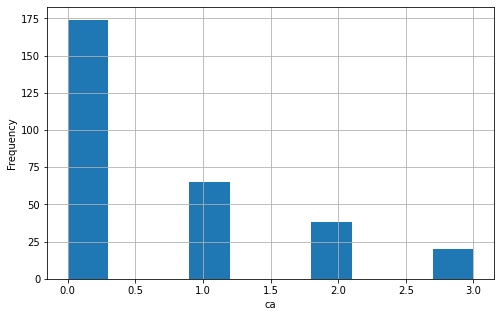

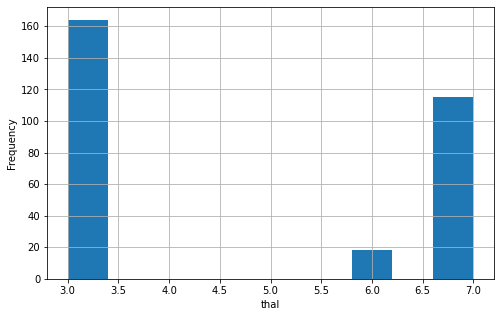

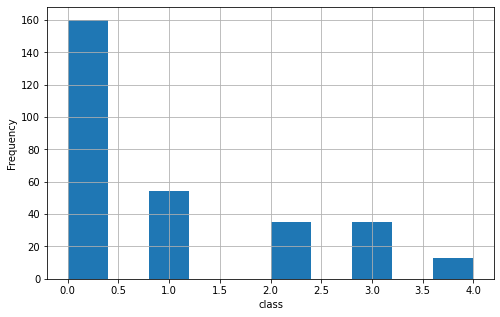

In [ ]:
for i in range (0, len(HD.columns)):
    HD[HD.columns[i]].plot(kind = 'hist', grid = True, figsize = (8, 5))
    plt.xlabel(HD.columns[i])
    plt.ylabel('Frequency')
    plt.show()

### 3 Normalize the Dataset

Decision Trees can handle all handles without Normalization. Therefore no adjustments to the data has been applied.

### 4 Split the Dataset in Multiclass and Binary

Add new Column "Class Binary" which is derived from the "Class" > 0

In [12]:
HD["class binary"] = np.where(HD["class"] > 0, 1, 0)
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


#### 4.1 Multiclass

For Multiclass we drop "Class Binary" and rename "Class" to "Class Multi"

In [13]:
HD_multi = HD.drop('class binary', axis=1)
HD_multi.rename(columns={'class': 'class multi'}, inplace=True)
HD_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class multi
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### 4.2 Binary

We drop "Class", because "Class Binary" is already available

In [14]:
HD_binary = HD.drop('class', axis=1)
HD_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 5 Define X & Y

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

#### 5.1 Multi

In [15]:
x_multi = HD_multi.drop('class multi', axis=1)       # features
y_multi = HD_multi['class multi']                    # labels

In [16]:
x_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
y_multi.head()

0    0
1    2
2    1
3    0
4    0
Name: class multi, dtype: int64

#### 5.2 Binary

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

In [18]:
x_binary = HD_binary.drop('class binary', axis=1)       # features
y_binary = HD_binary['class binary']                    # labels

In [19]:
x_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [20]:
y_binary.head()

0    0
1    1
2    1
3    0
4    0
Name: class binary, dtype: int32

### 6 Analysis of the different classes

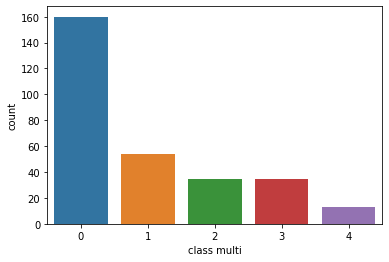

In [21]:
sns.countplot(y_multi);

In [22]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==0])/len(y_multi)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==1])/len(y_multi)*100), '%')
print('The percentage of 2 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==2])/len(y_multi)*100), '%')
print('The percentage of 3 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==3])/len(y_multi)*100), '%')
print('The percentage of 4 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==4])/len(y_multi)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 18.18 %
The percentage of 2 is: 11.78 %
The percentage of 3 is: 11.78 %
The percentage of 4 is: 4.38 %


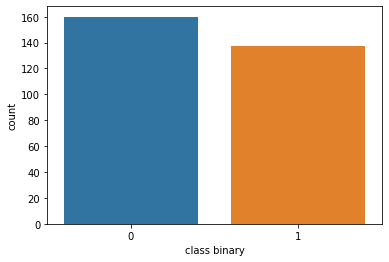

In [23]:
sns.countplot(y_binary);

In [24]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==0])/len(y_binary)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==1])/len(y_binary)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 46.13 %


### 7 Split the Dataset into Train-Validation-Test

#### 7.1 Multi

In [25]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_multi_train_val, x_multi_validation, y_multi_train_val, y_multi_validation = train_test_split(x_multi_train, y_multi_train, test_size=(0.2/0.7), random_state=42, stratify=y_multi_train)

In [26]:
#Quick check if the split is correct:
print("Shape of x_multi_train             : "+str(x_multi_train.shape))
print("Shape of x_multi_test              : "+str(x_multi_test.shape))
print("Shape of y_multi_train             : "+str(y_multi_train.shape))
print("Shape of y_multi_test              : "+str(y_multi_test.shape))
print('')
print("Lenght of Dataset                  : ", len(x_multi))
print("Percentage of Train_multi          : ", '{:.2f}'.format(len(x_multi_train)/len(x_multi)*100), '%')
print("Percentage of Test_multi           : ", '{:.2f}'.format(len(x_multi_test)/len(x_multi)*100), '%')

print("Percentage of x_multi_train_val    : ", '{:.2f}'.format(len(x_multi_train_val)/len(x_multi)*100), '%')
print("Percentage of Validation_multi     : ", '{:.2f}'.format(len(x_multi_validation)/len(x_multi)*100), '%')


Shape of x_multi_train             : (207, 13)
Shape of x_multi_test              : (90, 13)
Shape of y_multi_train             : (207,)
Shape of y_multi_test              : (90,)

Lenght of Dataset                  :  297
Percentage of Train_multi          :  69.70 %
Percentage of Test_multi           :  30.30 %
Percentage of x_multi_train_val    :  49.49 %
Percentage of Validation_multi     :  20.20 %


#### 7.2 Binary

Wichtig:
- alles korrekt mit Binary / Multi?
- Stratify nicht vergessen


In [27]:
from sklearn.model_selection import train_test_split

# First we split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_binary_train, x_binary_test, y_binary_train, y_binary_test = train_test_split(x_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

#Secondly we split in Train & Validation
# random_state means the code will always have the same training set (in order to reproduce results)

x_binary_train_val, x_binary_validation, y_binary_train_val, y_binary_validation = train_test_split(x_binary_train, y_binary_train, test_size=(0.2/0.7), random_state=42)

In [28]:
#Quick check if the split is correct:
print("Shape of x_binary_train             : "+str(x_binary_train.shape))
print("Shape of x_binary_test              : "+str(x_binary_test.shape))
print("Shape of y_binary_train             : "+str(y_binary_train.shape))
print("Shape of y_binary_test              : "+str(y_binary_test.shape))
print('')
print("Lenght of Dataset                   : ", len(x_binary))
print("Percentage of Train_binary          : ", '{:.2f}'.format(len(x_binary_train)/len(x_binary)*100), '%')
print("Percentage of Test_binary           : ", '{:.2f}'.format(len(x_binary_test)/len(x_binary)*100), '%')

print("Percentage of x_binary_train_val    : ", '{:.2f}'.format(len(x_binary_train_val)/len(x_binary)*100), '%')
print("Percentage of Validation_binary     : ", '{:.2f}'.format(len(x_binary_validation)/len(x_binary)*100), '%')


Shape of x_binary_train             : (207, 13)
Shape of x_binary_test              : (90, 13)
Shape of y_binary_train             : (207,)
Shape of y_binary_test              : (90,)

Lenght of Dataset                   :  297
Percentage of Train_binary          :  69.70 %
Percentage of Test_binary           :  30.30 %
Percentage of x_binary_train_val    :  49.49 %
Percentage of Validation_binary     :  20.20 %


### 8 Implementing the Models

Overview of the applied Models:

        8.1 Decision Tree Binary:
                
                8.1.1 Basic Decision Tree -> Train & Test + Max Debth = 3
                8.1.2 Decision Tree mit Cross Validation (KFold: Max Debth und Hyperparameter Tuning)
        8.2 Decision Tree Multiclass:
                
                8.2.1 Basic Decision Tree -> Train & Test + Max Debth = 3
                8.2.2 Decision Tree mit Cross Validation (KFold: Max Debth und Hyperparameter Tuning)
        8.3 Random Forest mit Binary:

        8.4 Random Forest mit Multiclass:

We use the following Model Abbreviations:
- dtb_basic
- dtb_cv
- dtm_basic
- dtm_cv
- rfb
- rfm

For each applied Model we will save the following Performance Metrics:
- Model
- Max Debth
- Accurary in Sample
- Accuracy out of Sample
- Precision Score
- Recall Score
- F1 Score
- TP
- TN
- FP
- FN

In [29]:
Results = []

#### 8.1 Decision Tree Binary

##### 8.1.1 Decision Tree Binary (dtb_basic)

In [30]:
# Decision tree classifier implementation of scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define the tree classifier
dtb_basic = DecisionTreeClassifier(max_depth=3, random_state=2)
dtb_basic.fit(x_binary_train, y_binary_train);

In [31]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score
#Create classification report
y_predict = dtb_basic.predict(x_binary_test)
report = classification_report(y_binary_test, y_predict, output_dict=True )
print(classification_report(y_binary_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        48
           1       0.76      0.62      0.68        42

    accuracy                           0.73        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90



In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
model = 'dtb_basic'
max_debth = 3
accuracy_in_sample = dtb_basic.score(x_binary_train, y_binary_train)
accurancy_out_sample = dtb_basic.score(x_binary_test, y_binary_test)
Precision = report['macro avg']['precision'] 
Recall = report['macro avg']['recall']
F1 = report['macro avg']['f1-score']
TP = 1
TN = 1
FP = 1
FN = 1

In [33]:
#Append the Results from the Loop to the existing Dataframe:
dtb_basic_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dtb_basic_results = pd.DataFrame(dtb_basic_temp)
dtb_basic_results

,0,1,2,3,4,5,6,7,8,9,10
0,dtb_basic,3,0.879227,0.733333,0.739496,0.72619,0.726721,1,1,1,1


##### 8.1.2 Decision Tree Binary with Cross Validation (dtb_cv)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtb_cv = DecisionTreeClassifier(max_depth=3, random_state=2)

# Train tree classifier on the training set
dtb_cv.fit(x_binary_train, y_binary_train);

https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-cross-validation-and-hyperparameter-tuning/

Was sollen wir genau nehmen?
- Grid Search CV (Siehe unten)
- cross_validate
- K-Feld
- LOOCV
- For Loop selber programmieren


Wenn man K-Fold macht oder Grid Search, muss man immernoch Train set nehmen oder gibt man das ganze Datenset an, da es die Unterteilung selber macht?

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

The next step after you define the range of values is to use a hyperparameter tuning method, there’s a bunch, the most common and expensive being Grid Search where others like Random Search and Bayesian Optimization will provide a “smarter”, less expensive tuning. These methods are not really the focus of this article but if you want to learn more, check the reference section [1].

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

df_classifier = DecisionTreeClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,10,15,20],
             'min_samples_split': [2, 3]}

dtb_cv = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

dtb_cv.fit(x_binary, y_binary);

Fitting 15 folds for each of 44 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:    3.8s finished


Habe hier das ganze Dataset genommen und nicht train

In [45]:
dtb_cv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [44]:
dtb_cv.best_score_

0.7845951035781543

In [46]:
dtb_cv.cv_results_['mean_test_score']

array([0.72725047, 0.72725047, 0.73647834, 0.73647834, 0.77564972,
       0.77564972, 0.76551789, 0.76329567, 0.73762712, 0.73205273,
       0.7373823 , 0.73293785, 0.73073446, 0.71958569, 0.73517891,
       0.72847458, 0.72843691, 0.72960452, 0.72730697, 0.73186441,
       0.72730697, 0.73186441, 0.72725047, 0.72725047, 0.73977401,
       0.73977401, 0.7845951 , 0.7845951 , 0.76546139, 0.76546139,
       0.75312618, 0.75423729, 0.75760829, 0.7486629 , 0.73177024,
       0.72952919, 0.74416196, 0.7373823 , 0.73743879, 0.74418079,
       0.73291902, 0.73966102, 0.73291902, 0.73966102])

In [35]:
# With cross validation
from sklearn.model_selection import cross_validate, KFold
# Define lists for the accuracies
dtb_cv_acc_list = []
dtb_cv_tpr_list = []
dtb_cv_acc_in_list = []
dtb_cv_tpr_in_list = []

In [293]:
from sklearn.model_selection import GridSearchCV
tree = dtb_cv.fit(x_binary_train, y_binary_train)
params = {'max_depth':[10, 11, 12, 13, 14, 15]}
gs = GridSearchCV(tree, params)
gs.fit(x_binary_train, y_binary_train)
x_result = gs.cv_results_
x_result

{'mean_fit_time': array([0.00518537, 0.00358443, 0.0037899 , 0.00359597, 0.00319901,
        0.00300651]),
 'std_fit_time': array([0.00117662, 0.00048346, 0.00113986, 0.00119388, 0.00039455,
        0.00064131]),
 'mean_score_time': array([0.00239425, 0.00240779, 0.00180216, 0.00238872, 0.00199318,
        0.00178647]),
 'std_score_time': array([0.00048934, 0.00080644, 0.00040262, 0.00048123, 0.00061846,
        0.00039518]),
 'param_max_depth': masked_array(data=[10, 11, 12, 13, 14, 15],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10},
  {'max_depth': 11},
  {'max_depth': 12},
  {'max_depth': 13},
  {'max_depth': 14},
  {'max_depth': 15}],
 'split0_test_score': array([0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
        0.61904762]),
 'split1_test_score': array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667]),
 'split2_test_score': array([0.8

Despite the plethora of wrong answers here that attempt to circumvent the error by numerically manipulating the predictions, the root cause of your error is a theoretical and not computational issue: you are trying to use a classification metric (accuracy) in a regression (i.e. numeric prediction) model (LinearRegression), which is meaningless.

https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target

In [294]:
scoring = ['accuracy', 'precision']
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring1 = {'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}

In [301]:
for depth in range(1,21):
    # model
    dtb_cv = DecisionTreeClassifier(max_depth=depth)
    # 10-Fold cross validation on whole dataset
    dtb_cv_results = cross_validate(dtb_cv, x_binary, y_binary,
                                cv = KFold(n_splits = 10, shuffle = True, random_state = 31),
                                scoring = ['accuracy', 'precision'] , return_train_score = True)
    # Scores in lists
    dtb_cv_acc_list.append(dtb_cv['test_accuracy'].mean())
    dtb_cv_tpr_list.append(dtb_cv['test_recall'].mean())
    dtb_cv_acc_in_list.append(dtb_cv['train_accuracy'].mean())
    dtb_cv_tpr_in_list.append(dtb_cv['train_recall'].mean())

TypeError: 'DecisionTreeClassifier' object is not subscriptable

In [324]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score
#Create classification report
y_predict = dtb_cv.predict(x_binary_test)
report = classification_report(y_binary_test, y_predict, output_dict=True )
print(classification_report(y_binary_test, y_predict))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [296]:
model = 'dtb_cv'
max_debth = 3
accuracy_in_sample = dtb_cv.score(x_binary_train, y_binary_train)
accurancy_out_sample = dtb_cv.score(x_binary_test, y_binary_test)
Precision = report['macro avg']['precision'] 
Recall = report['macro avg']['recall']
F1 = report['macro avg']['f1-score']
TP = 1
TN = 1
FP = 1
FN = 1

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [234]:
#Append the Results from the Loop to the existing Dataframe:
dtb_cv_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dtb_cv_results = pd.DataFrame(dtb_cv_temp)
dtb_cv_results

,0,1,2,3,4,5,6,7,8,9,10
0,dtb_cv,3,0.879227,0.733333,1,1,1,1,1,1,1


#### 8.2 Decision Tree Multiclass

##### 8.2.1 Decision Tree Basic (dtm_basic)

In [326]:
from sklearn.tree import DecisionTreeClassifier
dtm_basic = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=2)

# Train tree classifier on the training set
dtm_basic.fit(x_multi_train, y_multi_train);

In [327]:
#Create classification report
from sklearn.metrics import classification_report, accuracy_score
dtm_basic_report = dtm_basic.predict(x_multi_test)
print(classification_report(y_multi_test, dtm_basic_report))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        48
           1       0.00      0.00      0.00        16
           2       0.10      0.18      0.13        11
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00         4

    accuracy                           0.54        90
   macro avg       0.16      0.23      0.19        90
weighted avg       0.39      0.54      0.45        90



c:\Users\lione\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [328]:
model = 'dtm_basic'
max_debth = 3
accuracy_in_sample = dtm_basic.score(x_multi_train, y_multi_train)
accurancy_out_sample = dtm_basic.score(x_multi_test, y_multi_test)
Precision = report['macro avg']['precision'] 
Recall = report['macro avg']['recall']
F1 = report['macro avg']['f1-score']
TP = 1
TN = 1
FP = 1
FN = 1

In [329]:
#Append the Results from the Loop to the existing Dataframe:
dtm_basic_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dtm_basic_results = pd.DataFrame(dtm_basic_temp)
dtm_basic_results

,0,1,2,3,4,5,6,7,8,9,10
0,dtm_basic,3,0.642512,0.544444,0.739496,0.72619,0.726721,1,1,1,1


##### 8.2.2 Decision Tree Multiclass Cross Validation (dtm_cv)

In [138]:
# define score lists
# Out-of-Sample Scores
acc_liste = []
tpr_liste = []
fpr_liste = []

# Define list for in-sample Scores
acc_in_liste = []
tpr_in_liste = []
fpr_in_liste = []

In [248]:
for depth in range(1,21):
    # define model    
    dtm_cv = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)
    # train model
    dtm_cv.fit(x_multi_train, y_multi_train)
    # In-Sample Scores:
    # predict on train set
    y_pred_in = dtm_cv.predict(x_multi_train)
    # accuracy
    acc_in = dtm_cv.score(x_multi_train, y_multi_train)
    # True Positive Rate
    tpr_in = recall_score(y_multi_train, y_pred_in, average=None)  #ACHTUNG HIER AVERAGE NONE EINGEFÜGT!!!
    # False Positive Rate
    fpr_in = ((1-y_multi_train)*y_pred_in).sum()/(1-y_multi_train).sum()
    # results in list 
    acc_in_liste.append(acc_in) # With append you add each of the new values into the list, as the 
    tpr_in_liste.append(tpr_in)
    fpr_in_liste.append(fpr_in)

    # Out-of-Sample Scores:
    # predict on test set
    y_pred = dtm_cv.predict(x_multi_test)
    # Acc
    acc = dtm_cv.score(x_multi_test, y_multi_test)
    # True Positive Rate
    tpr = recall_score(y_multi_test, y_pred, average=None) #ACHTUNG HIER AVERAGE NONE EINGEFÜGT!!!
    # False Positive Rate
    fpr = ((1-y_multi_test)*y_pred).sum()/(1-y_multi_test).sum()
    # put results in list
    acc_liste.append(acc)
    tpr_liste.append(tpr)
    fpr_liste.append(fpr)

In [249]:
acc_liste

[0.5333333333333333,
 0.5444444444444444,
 0.5666666666666667,
 0.5111111111111111,
 0.4666666666666667,
 0.5,
 0.4222222222222222,
 0.43333333333333335,
 0.4222222222222222,
 0.4666666666666667,
 0.4444444444444444,
 0.4777777777777778,
 0.4444444444444444,
 0.4222222222222222,
 0.4444444444444444,
 0.4666666666666667,
 0.4111111111111111,
 0.4444444444444444,
 0.43333333333333335,
 0.4111111111111111,
 0.5333333333333333,
 0.5444444444444444,
 0.5666666666666667,
 0.5555555555555556,
 0.4666666666666667,
 0.5,
 0.45555555555555555,
 0.4444444444444444,
 0.4444444444444444,
 0.45555555555555555,
 0.3888888888888889,
 0.4,
 0.4,
 0.43333333333333335,
 0.45555555555555555,
 0.43333333333333335,
 0.43333333333333335,
 0.4222222222222222,
 0.4222222222222222,
 0.4111111111111111,
 0.5333333333333333,
 0.5444444444444444,
 0.5888888888888889,
 0.5666666666666667,
 0.4666666666666667,
 0.4888888888888889,
 0.43333333333333335,
 0.45555555555555555,
 0.4444444444444444,
 0.4444444444444444,


In [302]:
# With cross validation
from sklearn.model_selection import cross_validate, KFold
# Define lists for the accuracies
dtm_cv_acc_list = []
dtm_cv_tpr_list = []
dtm_cv_acc_in_list = []
dtm_cv_tpr_in_list = []

In [303]:
for depth in range(1,21):
    # model
    dtm_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    # 10-Fold cross validation on whole dataset
    dtm_cv_results = cross_validate(dtm_cv, x_multi, y_multi,
                            cv = KFold(n_splits = 10, shuffle = True, random_state = 31),
                            scoring = ['accuracy', 'recall'], return_train_score = True)
    # Scores in lists
    dtm_cv_acc_list.append(dtm_cv_results['test_accuracy'].mean())
    dtm_cv_tpr_list.append(dtm_cv_results['test_recall'].mean())
    dtm_cv_acc_in_list.append(dtm_cv_results['train_accuracy'].mean())
    dtm_cv_tpr_in_list.append(dtm_cv_results['train_recall'].mean())

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [259]:
#Hier müssen die Resultate von der Liste von oben einfügen:
model = 'dtm_cv'
max_debth = 3
accuracy_in_sample = dtm_cv.score(x_multi_train, y_multi_train)
accurancy_out_sample = dtm_cv.score(x_multi_test, y_multi_test)
Precision = report['macro avg']['precision'] 
Recall = report['macro avg']['recall']
F1 = report['macro avg']['f1-score']
TP = 1
TN = 1
FP = 1
FN = 1

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [311]:
#Append the Results from the Loop to the existing Dataframe:
dtm_cv_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
dtm_cv_results = pd.DataFrame(dtm_cv_temp)
dtm_cv_results

,0,1,2,3,4,5,6,7,8,9,10
0,rfm,3,1.0,0.544444,0.739496,0.72619,0.726721,1,1,1,1


#### 8.3 Random Forest Binary (rfb)

In [260]:
from sklearn.ensemble import RandomForestClassifier

rfb = RandomForestClassifier(max_depth=10, random_state=0)
rfb.fit(x_binary_train, y_binary_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [314]:
model = 'rfb'
max_debth = 3
accuracy_in_sample = rfb.score(x_binary_train, y_binary_train)
accurancy_out_sample = rfb.score(x_binary_test, y_binary_test)
Precision = report['macro avg']['precision'] 
Recall = report['macro avg']['recall']
F1 = report['macro avg']['f1-score']
TP = 1
TN = 1
FP = 1
FN = 1

In [315]:
#Append the Results from the Loop to the existing Dataframe:
rfb_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
rfb_results = pd.DataFrame(rfb_temp)
rfb_results

,0,1,2,3,4,5,6,7,8,9,10
0,rfb,3,1.0,0.8,0.739496,0.72619,0.726721,1,1,1,1


#### 8.4 Random Forest Multiclass (rfm)

In [306]:
# Import relevant packages
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(max_depth=10, random_state=0)
rfm.fit(x_multi_train, y_multi_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [316]:
model = 'rfm'
max_debth = 3
accuracy_in_sample = rfm.score(x_multi_train, y_multi_train)
accurancy_out_sample = rfm.score(x_multi_test, y_multi_test)
Precision = report['macro avg']['precision'] 
Recall = report['macro avg']['recall']
F1 = report['macro avg']['f1-score']
TP = 1
TN = 1
FP = 1
FN = 1

In [317]:
#Append the Results from the Loop to the existing Dataframe:
rfm_temp = [(model, max_debth, accuracy_in_sample, accurancy_out_sample, Precision, Recall, F1, TP, TN, FP, FN)]
rfm_results = pd.DataFrame(rfm_temp)
rfm_results

,0,1,2,3,4,5,6,7,8,9,10
0,rfm,3,1.0,0.544444,0.739496,0.72619,0.726721,1,1,1,1


### 9 All Results

In [330]:
dtb_basic_results
dtm_cv_results
dtb_basic_results
dtm_cv_results
rfb_results
rfm_results

,0,1,2,3,4,5,6,7,8,9,10
0,rfm,3,1.0,0.544444,0.739496,0.72619,0.726721,1,1,1,1


In [331]:
Results = pd.DataFrame()
Results = Results.append(dtb_basic_results)
Results = Results.append(dtm_cv_results)
Results = Results.append(dtb_basic_results)
Results = Results.append(dtm_cv_results)
Results = Results.append(rfb_results)
Results = Results.append(rfm_results)
Results.rename(columns= {0:'Model', 1:'max_debth', 2:'accuracy_in_sample', 3:'accurancy_out_sample', 4:'accurancy_out_sample', 5:'Precision', 6:'Recall', 7:'F1', 8:'TP', 9:'TN', 10:'FP', 11:'FN' }, inplace = True)
#Results.to_excel('Results.xlsx')
Results

,Model,max_debth,accuracy_in_sample,accurancy_out_sample,accurancy_out_sample,Precision,Recall,F1,TP,TN,FP
0,dtb_basic,3,0.879227,0.733333,0.739496,0.72619,0.726721,1,1,1,1
0,rfm,3,1.000000,0.544444,0.739496,0.72619,0.726721,1,1,1,1
0,dtb_basic,3,0.879227,0.733333,0.739496,0.72619,0.726721,1,1,1,1
0,rfm,3,1.000000,0.544444,0.739496,0.72619,0.726721,1,1,1,1
0,rfb,3,1.000000,0.800000,0.739496,0.72619,0.726721,1,1,1,1
0,rfm,3,1.000000,0.544444,0.739496,0.72619,0.726721,1,1,1,1


### 10 Plots of best Model

In [266]:
predicted = rf.predict(x_multi_test)
predicted_results = pd.DataFrame(predicted)

predicted_results
accuracy_score(y_multi_train, predicted_results)

from sklearn.tree import plot_tree
plot_tree(dtb_basic, filled = True, rounded = True)

NameError: name 'rf' is not defined

In [267]:
# Out-of-sample 
y_pred = de_reg_basic.predict(x_multi_test)

# confusion_matrix
from sklearn.metrics import confusion_matrix

# Out-of-Sample Confusion Matrix
cm_credit = confusion_matrix(y_test, y_pred)
cm_credit

def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

plot_decision_boundary(dtb_basic, X, y)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dtb_basic, x_test, y_test,cmap=plt.cm.Blues)

NameError: name 'de_reg_basic' is not defined